In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

D:\Anaconda\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
recent_grads=pd.read_csv("recent-grads.csv")

FileNotFoundError: File b'recent-grads.csv' does not exist

In [ ]:
recent_grads["Total"].sort_values(ascending=False)


In [ ]:
raw_data_count=recent_grads.shape[0]

In [ ]:
recent_grads=recent_grads.dropna(axis=0)

In [ ]:
cleaned_data_count=recent_grads.shape[0]
print(raw_data_count, cleaned_data_count)

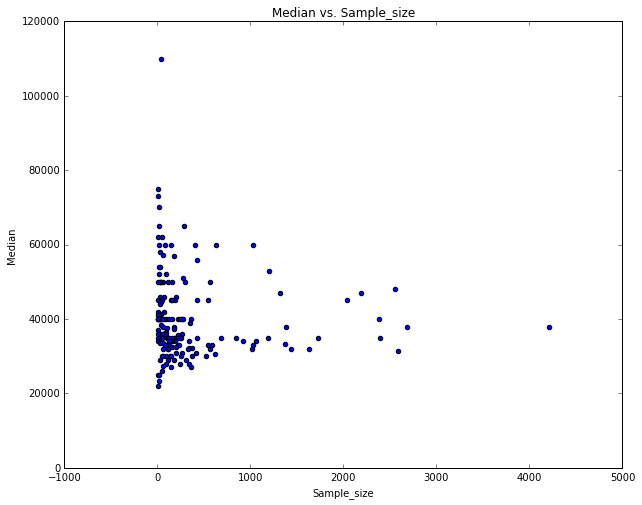

In [92]:
#Making Scatter Plots of different columns in the DF

recent_grads.plot(x='Sample_size', y='Median', kind='scatter', title='Median vs. Sample_size', figsize=(10,8))

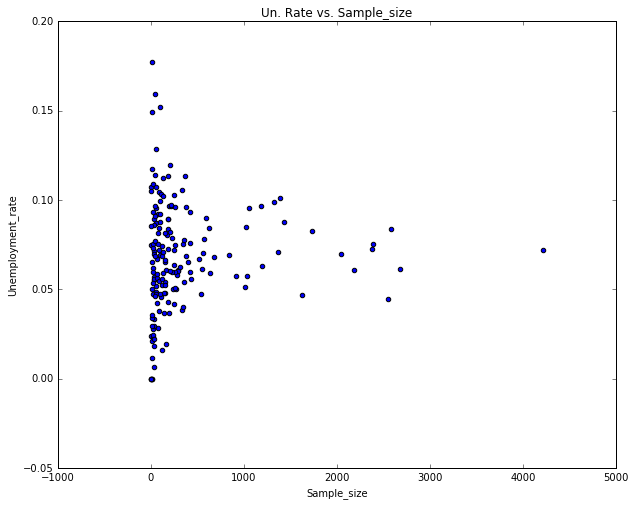

In [93]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter', title='Un. Rate vs. Sample_size', figsize=(10,8))

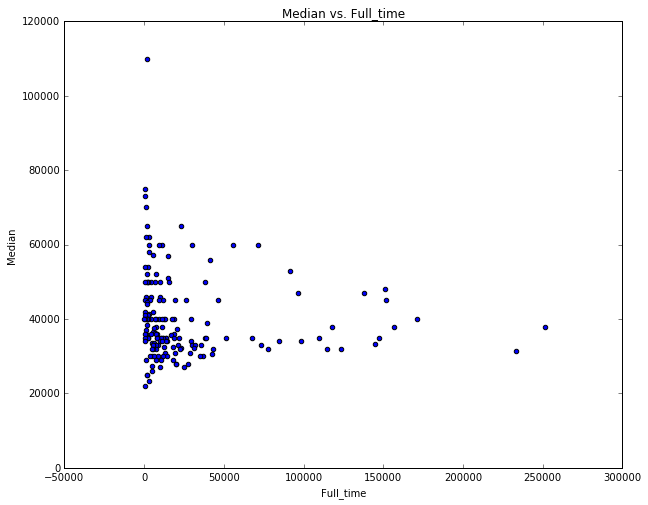

In [94]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter', title='Median vs. Full_time', figsize=(10,8))

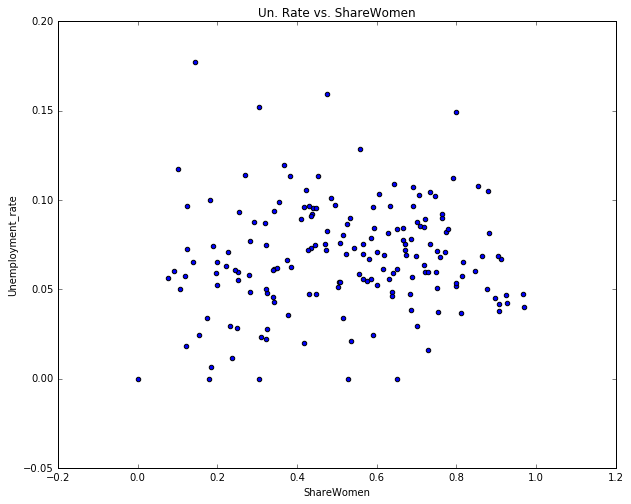

In [95]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter', title='Un. Rate vs. ShareWomen', figsize=(10,8))

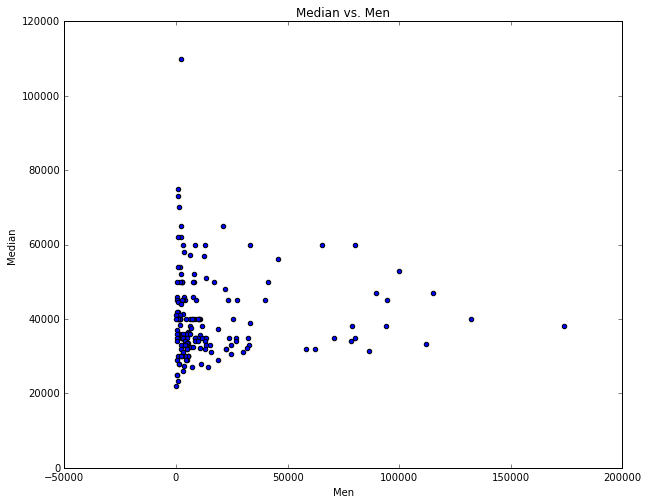

In [96]:
recent_grads.plot(x='Men', y='Median', kind='scatter', title='Median vs. Men', figsize=(10,8))

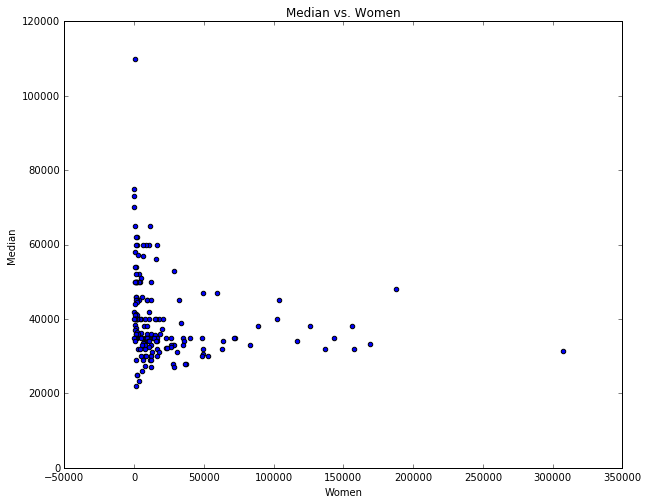

In [97]:
recent_grads.plot(x='Women', y='Median', kind='scatter', title='Median vs. Women', figsize=(10,8))

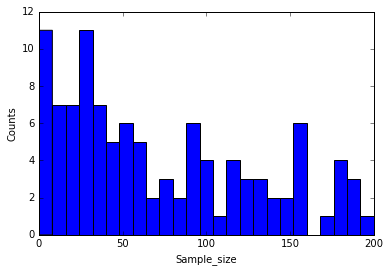

In [54]:
# Making histograms of different columns in the DF
fig, ax =plt.subplots()
ax.hist(recent_grads["Sample_size"], bins=25, range=(0,200))

ax.set_xlabel("Sample_size")
ax.set_ylabel("Counts")
plt.show()

#Most of the times (61%) the sample size was lower than 200 people

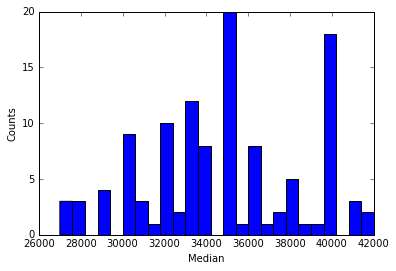

In [36]:
fig, ax1 =plt.subplots()
ax1.hist(recent_grads["Median"], bins=25, range=(27000,42000))

ax1.set_xlabel("Median")
ax1.set_ylabel("Counts")
plt.show()

#The most common salary range is [30.000-40.000 $]
# 59% of the total

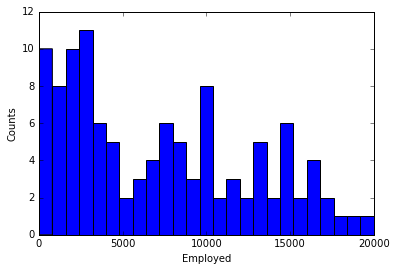

In [53]:
fig, ax2 =plt.subplots()
ax2.hist(recent_grads["Employed"], bins=25, range=(0,20000))

ax2.set_xlabel("Employed")
ax2.set_ylabel("Counts")
plt.show()

#65% of majors has a number of employed people 
#inferior to 20000 units

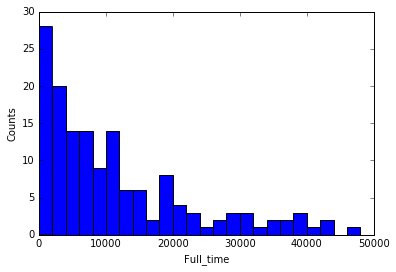

In [52]:
fig, ax3 =plt.subplots()
ax3.hist(recent_grads["Full_time"], bins=25, range=(0,50000))

ax3.set_xlabel("Full_time")
ax3.set_ylabel("Counts")
plt.show()

#57% of majors has a number of people employed full-time
#inferior to 12.000 units


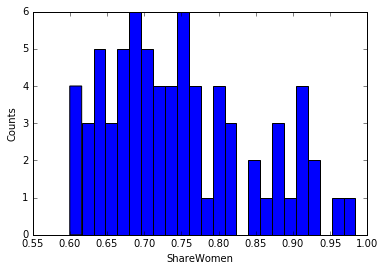

In [46]:
fig, ax4 =plt.subplots()
ax4.hist(recent_grads["ShareWomen"], bins=25, range=(0.6,1))

ax4.set_xlabel("ShareWomen")
ax4.set_ylabel("Counts")
plt.show()

#In the majority of the cases women represent between 60 and 80%
#of the people who graduated in a major

#55 cases on 172 have a % of graduated women inferior to 40% which means that
#32% of majors are predominantly male

#72 cases on 172 have a % of graduated women superior to 60%, which means that
#42% of majors are predominantly female

#26% of majors have a pretty equal number of graduated males and females




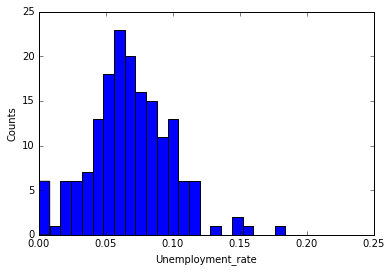

In [44]:
fig, ax5 =plt.subplots()
ax5.hist(recent_grads["Unemployment_rate"], bins=25, range=(0,0.2))

ax5.set_xlabel("Unemployment_rate")
ax5.set_ylabel("Counts")
plt.show()

#The unemployment rate for people holding any kind 
#of the listed majors ranges between 0.05 and 0.10

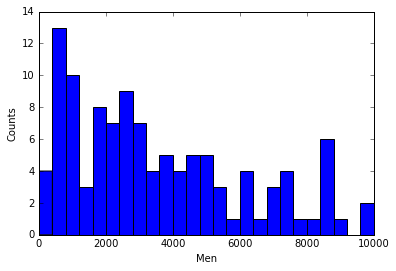

In [50]:
fig, ax6 =plt.subplots()
ax6.hist(recent_grads["Men"], bins=25, range=(0,10000))

ax6.set_xlabel("Men")
ax6.set_ylabel("Counts")
plt.show()

#64.5% of majors have a number of graduated men inferior to 10.000 units

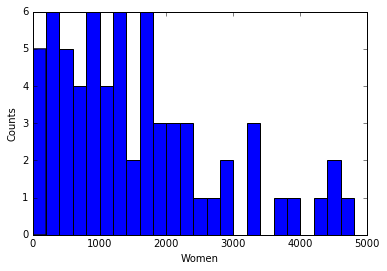

In [49]:
fig, ax7 =plt.subplots()
ax7.hist(recent_grads["Women"], bins=25, range=(0,5000))

ax7.set_xlabel("Women")
ax7.set_ylabel("Counts")
plt.show()

#33% of majors have a number of graduated women inferior to 3.000 units

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa743b4d898>,
      dtype=object)

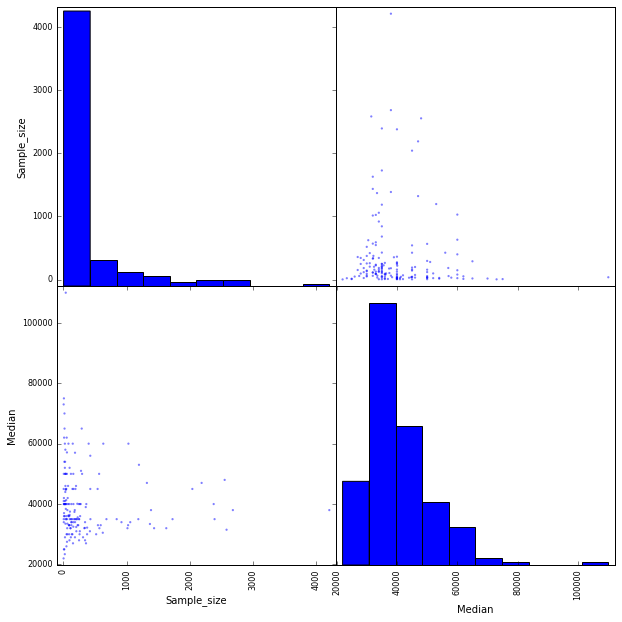

In [56]:
#Let's create matrices of histograms and scatter plots with a new function
# allowing us to quickly outline the relationships between two variables
# and their distributions. 2x2 and 3x3

from pandas.plotting import scatter_matrix 
scatter_matrix(recent_grads[["Sample_size","Median"]], figsize=(10,10))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa7438c34a8>,
      dtype=object)

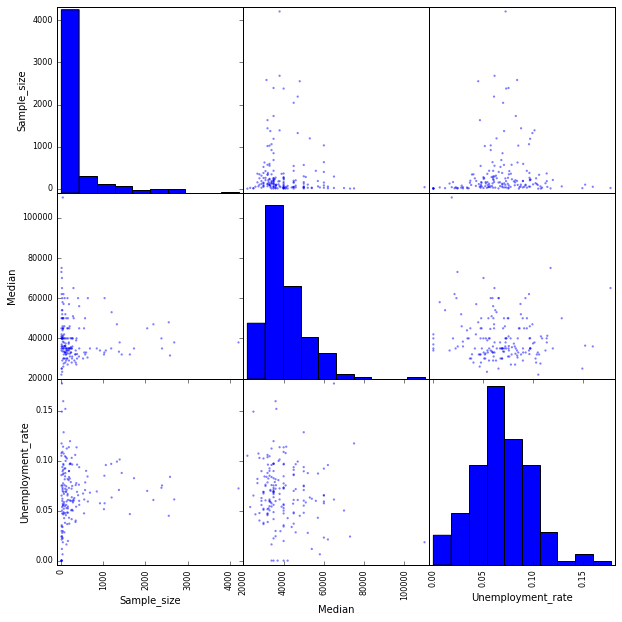

In [57]:
scatter_matrix(recent_grads[["Sample_size","Median","Unemployment_rate"]],figsize=(10,10))

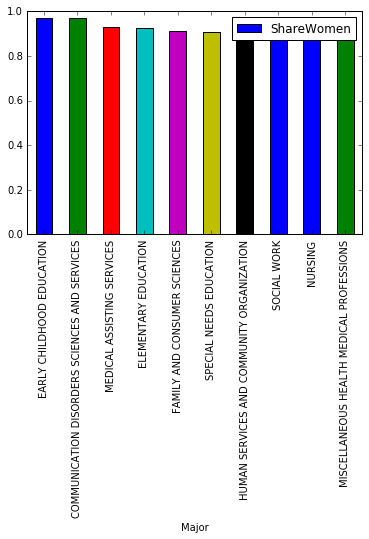

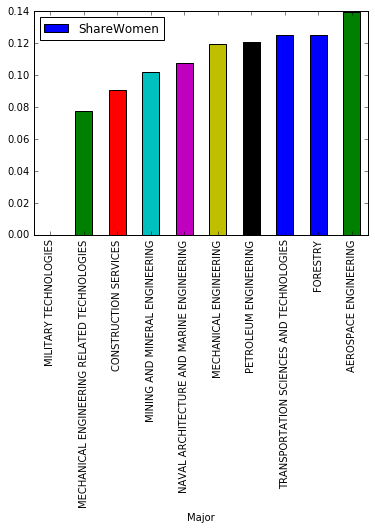

In [67]:
recent_grads_sorted_women_up=recent_grads.sort_values(by="ShareWomen", ascending=False)
recent_grads_sorted_women_dw=recent_grads.sort_values(by="ShareWomen", ascending=True)

recent_grads_sorted_women_up[:10].plot.bar(x='Major', y='ShareWomen')
recent_grads_sorted_women_dw[:10].plot.bar(x='Major', y='ShareWomen')

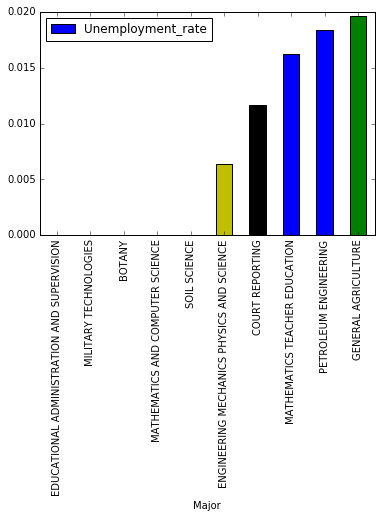

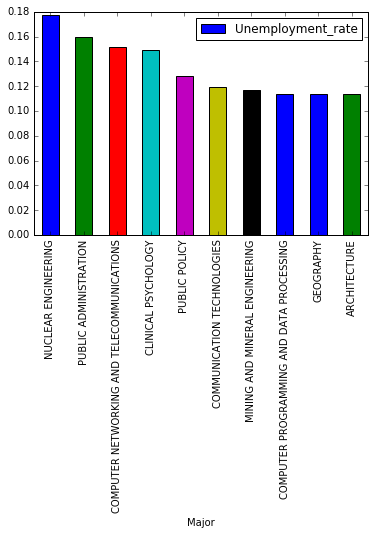

In [68]:
recent_grads_sort_unemp_up=recent_grads.sort_values(by='Unemployment_rate',ascending=True)
recent_grads_sort_unemp_dw=recent_grads.sort_values(by='Unemployment_rate',ascending=False)
                                                    
recent_grads_sort_unemp_up[:10].plot.bar(x='Major',y='Unemployment_rate')                                                    
recent_grads_sort_unemp_dw[:10].plot.bar(x='Major',y='Unemployment_rate')                                                    

In [81]:
categories=recent_grads["Major_category"].value_counts().index
categories
men_categ={}
women_categ={}
for i in categories:
    df_categ=recent_grads.loc[recent_grads["Major_category"]==i]
    men_categ[i]=df_categ["Men"].sum() 
    women_categ[i]=df_categ["Women"].sum()
    
uomini=pd.Series(men_categ)
donne=pd.Series(women_categ)
df_categ=pd.DataFrame(uomini, columns=['Tot_men'])
df_categ['Tot_women']=donne
df_categ

,Tot_men,Tot_women
Agriculture & Natural Resources,40357.0,35263.0
Arts,134390.0,222740.0
Biology & Life Science,184919.0,268943.0
Business,667852.0,634524.0
Communications & Journalism,131921.0,260680.0
Computers & Mathematics,208725.0,90283.0
Education,103526.0,455603.0
Engineering,408307.0,129276.0
Health,75517.0,387713.0
Humanities & Liberal Arts,272846.0,440622.0


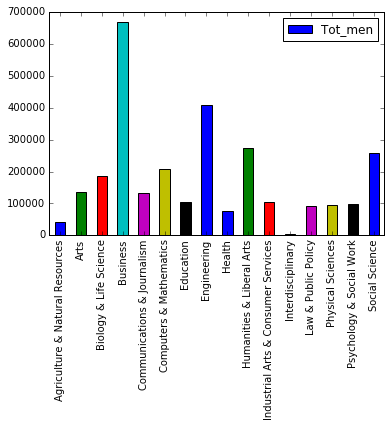

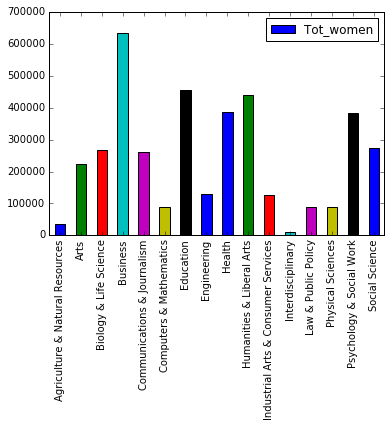

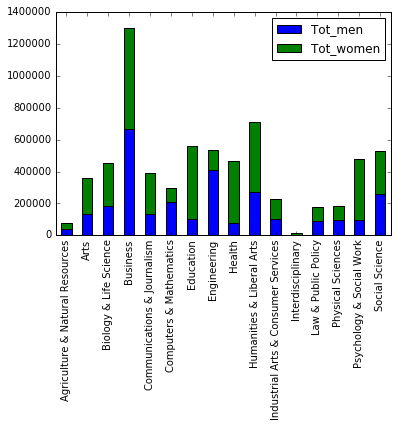

In [84]:
df_categ.plot.bar(y='Tot_men')
df_categ.plot.bar(y='Tot_women')
df_categ.plot.bar(stacked=True)

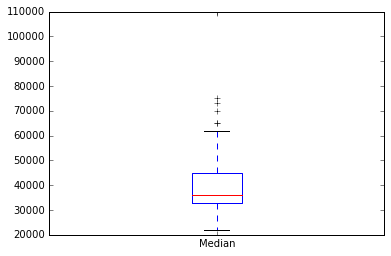

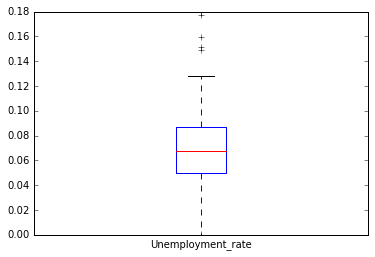

In [91]:
recent_grads.plot.box(y="Median")
recent_grads.plot.box(y='Unemployment_rate')

Average Salary: the first quartile (25%) ranges between 25k and 35k USD, the second quartile (50%) between 35k and 37k USD with the average salary being ~37k USD. The third quartile (75%) ranges between 37k and 45k USD and the last quartile (100%) ranges between 45k and 65k USD. There are some other cases where the average salary exceeds the 65k USD but those are considered as outliers.

Unemployment Rate:the first quartile (25%) ranges between 0 and 0.05, the second quartile (50%) between 0.05 and 0.07 with this last value being the average unemployment rate. The third quartile (75%) ranges between 0.07 and 0.09 and the last quartile (100%) ranges between 0.09 and 0.13. Even in this case we have some outliers corresponding to unemployment rates exceeding 0.15. 

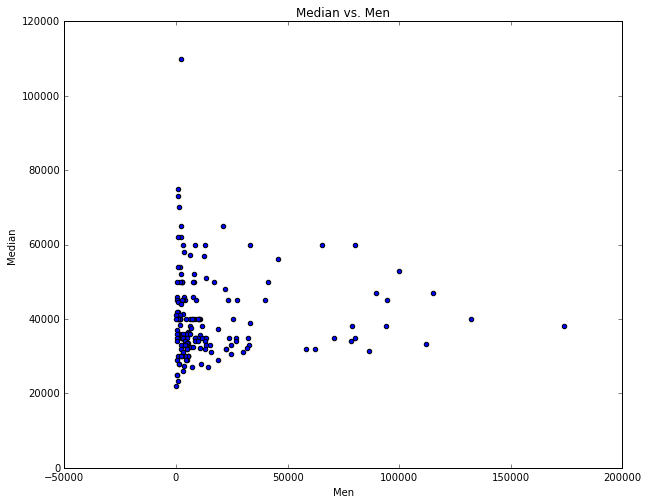

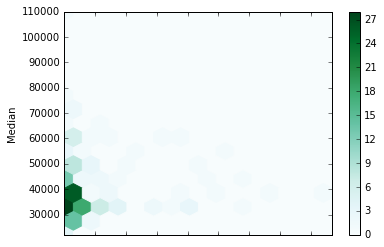

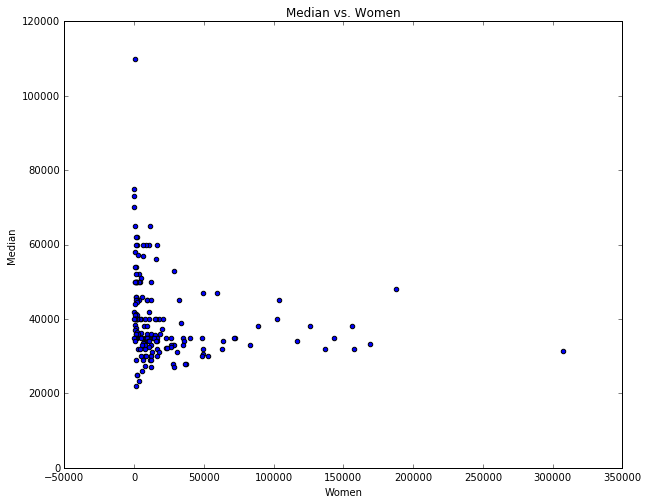

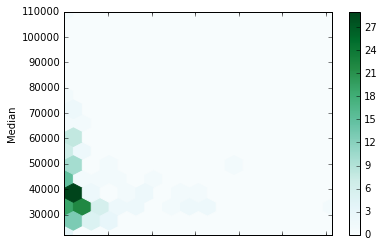

In [101]:
recent_grads.plot(x='Men', y='Median', kind='scatter', title='Median vs. Men', figsize=(10,8))
recent_grads.plot.hexbin(x='Men', y='Median', gridsize=15)
recent_grads.plot(x='Women', y='Median', kind='scatter', title='Median vs. Women', figsize=(10,8))
recent_grads.plot.hexbin(x='Women', y='Median', gridsize=15)

Having a look at the hexagonal bins plots we notice that, on average, women have a slightly better average salary. If, indeed, the darkest hexagon in the Median-Men plot is a little over the 30k USD per year, in the Median-Women plot it is clearly around the 40k USD per year.